In [1]:
import os 
dir_primary = 'F:/UrbanDataProject/land_surface_temperature/code/analysis'
# os.chdir('/home/tml/research/land_surface_temperature/code/analysis')
os.chdir(dir_primary)
from analysis import *
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import glob
code_dir = os.getcwd()
os.chdir('../..')


# Import data

In [2]:
cities = ['bal', 'por', 'det', 'phx']
# import data
grid_size = 500
df = import_data(grid_size)

# Cross-validation over all data

In [3]:
# number of holdouts
sim_num = 100

In [4]:
# only run if you need to recalculate the bootstrapped validation results
# regressions(df, cities, sim_num, grid_size, do_par = False)

In [5]:
# import data
path = 'data/regression/holdout_{}'.format(grid_size)                     # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))     # advisable to use os.path.join as this makes concatenation OS independent

df_from_each_file = (pd.read_csv(f) for f in all_files)
loss = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
loss = loss.dropna()

In [7]:
loss = loss.replace({'diurnal':'day\n(mean)','diurnalmax':'day\n(max)','nocturnal':'night\n(mean)','nocturnalmax':'night\n(max)'})

<Figure size 504.567x311.84 with 0 Axes>

f:\urbandataproject\land_surface_temperature\venv\lib\site-packages\matplotlib\figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


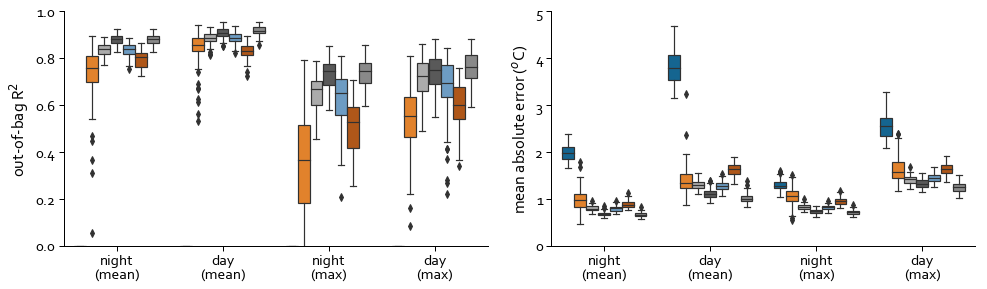

model                        average       cnn       gam      gbrt      mars  \
error_metric time_of_day                                                       
mae          day\n(max)     2.564646  1.629633  1.408294  1.322404  1.435396   
             day\n(mean)    3.793816  1.392183  1.293562  1.106510  1.274292   
             night\n(max)   1.292222  1.048560  0.827229  0.732647  0.810906   
             night\n(mean)  1.988595  0.964810  0.794228  0.678812  0.790918   
r2           day\n(max)    -0.013222  0.545621  0.714931  0.742229  0.670402   
             day\n(mean)   -0.016212  0.842708  0.884571  0.907450  0.886850   
             night\n(max)  -0.016358  0.337045  0.651277  0.729819  0.618296   
             night\n(mean) -0.017586  0.734047  0.834893  0.879560  0.833907   

model                            mlr        rf  
error_metric time_of_day                        
mae          day\n(max)     1.641714  1.237932  
             day\n(mean)    1.622561  1.002310  
   

<Figure size 432x288 with 0 Axes>

In [8]:
plot_holdouts(loss, grid_size)